<a href="https://colab.research.google.com/github/jh0n3/at01/blob/master/At06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Redes Neurais Convolucionais - CNN**
* Dataset de diferentes texturas
* Três tipos de tecido com diferentes texturas foram selecionadas: 
 * algodão, 
 * linho, e 
 * veludo.
* O objetivo é classificar o tecido corretamente. 

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Importar bibliotecas necessárias

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score

from keras import preprocessing
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop


## 2. Lendo uma imagem (teste)

In [21]:
#lendo imagem
img = cv2.imread('/content/drive/My Drive/ML_jh0n3/KTH_TIPS/train/linen/44-scale_9_im_9_grey.png')

In [22]:
img.shape

(200, 200, 3)

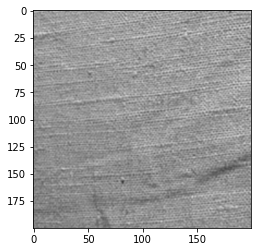

In [23]:
#plotando imagem exemplo. Tecido = linen (linho)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [24]:
#transformando imagem em matriz de pixels
pixels = np.asarray(img)
pixels

array([[[125, 125, 125],
        [146, 146, 146],
        [110, 110, 110],
        ...,
        [182, 182, 182],
        [143, 143, 143],
        [124, 124, 124]],

       [[223, 223, 223],
        [200, 200, 200],
        [188, 188, 188],
        ...,
        [156, 156, 156],
        [174, 174, 174],
        [212, 212, 212]],

       [[184, 184, 184],
        [153, 153, 153],
        [174, 174, 174],
        ...,
        [179, 179, 179],
        [189, 189, 189],
        [207, 207, 207]],

       ...,

       [[136, 136, 136],
        [110, 110, 110],
        [147, 147, 147],
        ...,
        [176, 176, 176],
        [168, 168, 168],
        [144, 144, 144]],

       [[140, 140, 140],
        [133, 133, 133],
        [138, 138, 138],
        ...,
        [168, 168, 168],
        [141, 141, 141],
        [111, 111, 111]],

       [[113, 113, 113],
        [140, 140, 140],
        [121, 121, 121],
        ...,
        [147, 147, 147],
        [164, 164, 164],
        [166, 166, 166]]

### Lendo todas as imagens

In [25]:
input_dir = '/content/drive/My Drive/ML_jh0n3/KTH_TIPS/'

In [26]:
#tipo = train ou test
classes = {'linen':0,'cotton':1,'corduroy':2}
def ler_dataset(tipo):
  X = []
  y = []
  qtd = 65 if tipo == 'train' else 16
  #para cada pasta
  for pasta in os.listdir(input_dir+tipo+'/'):
    print(pasta)
    #para cada imagem na pasta
    for img_file in os.listdir(input_dir+tipo+'/'+pasta+'/')[:qtd]:
      #leia a imagem
      img = cv2.imread(input_dir+tipo+'/'+pasta+'/'+img_file)
      #transforme imagem em array de pixels e salve na lista de imagens
      X.append(img)
      #guarde a classificação da imagem
      y.append(classes[pasta])
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y

In [27]:
X_treino,y_treino = ler_dataset('train')

linen
cotton
corduroy


In [28]:
X_treino.shape

(195, 200, 200, 3)

In [29]:
y_treino.shape

(195,)

In [30]:
X_teste,y_teste = ler_dataset('test')

linen
cotton
corduroy


In [31]:
X_teste.shape

(48, 200, 200, 3)

In [32]:
y_teste.shape

(48,)

In [33]:
#transformando labels de numérico para categórico
y_treino = to_categorical(y_treino, num_classes = 3)
y_teste = to_categorical(y_teste, num_classes = 3)

**Até aqui foi pra organizar os dados de entrada pra CNN**

## 3. Re-escala dos Dados

In [34]:
X_treino = X_treino/255
X_teste = X_teste/255

## 4. Definindo CNN

In [35]:
#definição do modelo
model = Sequential()

# 2 camadas de convolução de 32 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (200,200,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 64 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 128 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#  2 camadas fully conected 
model.add(Flatten())#converte os mapas de ativação finais para um veter de 1 dimensão
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax")) #3 pq tem 3 classes

In [36]:
# Definindo o algoritmo otmizador
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [37]:
# Compilando o modelo
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [38]:
# Descrição do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      3

In [43]:
# treinamento do modelo
model.fit(X_treino, y_treino, epochs=1,verbose = 1)

7/7 [==============================] - 110s 16s/step - loss: 1.1000 - accuracy: 0.3385


## **Comentários:**
O dataset de tipos de tecido utilizado nesta atividade coinsiderou apenas 3 tipos (algodão, veludo e linho). Apenas **81 imagens** estavam disponível para cada um dos três tipos, o que constitui um número pequeno e, com isso, pode ter comprometido a acurácia do modelo.
Foram utilizadas **65 imagens para treino e 16 para teste** em cada classe do tecido.

Do ponto de vista das imagens, algumas amostras apresentaram, além dos tecido, um **fundo**, o que pode ter comprometido o resultado. As amostras apresentam **diferentes escalas**, em que foram adiquiridas em diferentes distancias entre câmera e objeto. As amostras também apresentam instancias **disfocadas**. Esses fatores tambéms podem ter interferido no sucesso do modelo.


Como mencionado, o numero de instancias utilizadas foi pequeno resultando em uma acurácia de **~ 33.8%**. Um dataset de maior tamanho poderia melhorar a acurácia. Outras conigurações para a CNN talvez pudessem ser testadas visando melhorar a acurácia.

Uma questão a ser observada elevado número de parametros (**~20,9 milhões**) aumentaria o custo computacional do modelo, sobretudo em um dataset com de elevado numero de instâncias. 


## 5. Avaliando Modelo

In [41]:
model.evaluate(X_teste,y_teste)

2/2 [==============================] - 3s 1s/step - loss: 1.0997 - accuracy: 0.3333


[1.099707007408142, 0.3333333432674408]